In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [4]:
data = pd.read_csv('submission.csv')


In [5]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Ridge Classification using Logistic Regression with **L2**

In [8]:
ridge_clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_clf.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_clf.predict(X_test_scaled)
ridge_acc = accuracy_score(y_test, y_pred_ridge)

# **Lasso Classification using Logistic Regression with L1**

In [9]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_clf.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_clf.predict(X_test_scaled)
lasso_acc = accuracy_score(y_test, y_pred_lasso)

# **SVM**

In [10]:
svm_clf = SVC(kernel='linear', C=1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)

# **Naive Bayes**

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)


In [12]:
print(f"Ridge Accuracy: {ridge_acc:.4f}")
print(f"Lasso Accuracy: {lasso_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")


Ridge Accuracy: 0.6429
Lasso Accuracy: 0.6429
SVM Accuracy: 0.6429
Naive Bayes Accuracy: 0.6429


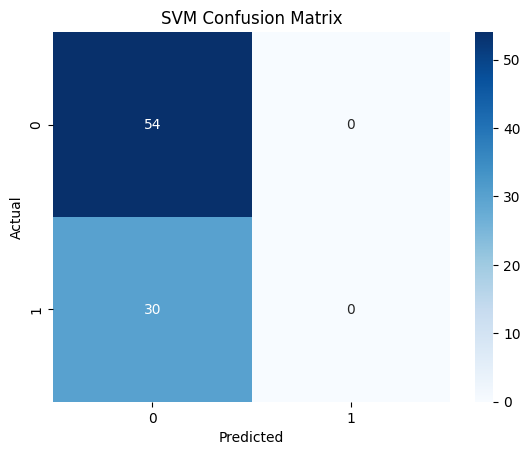

In [13]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-14-1380135700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


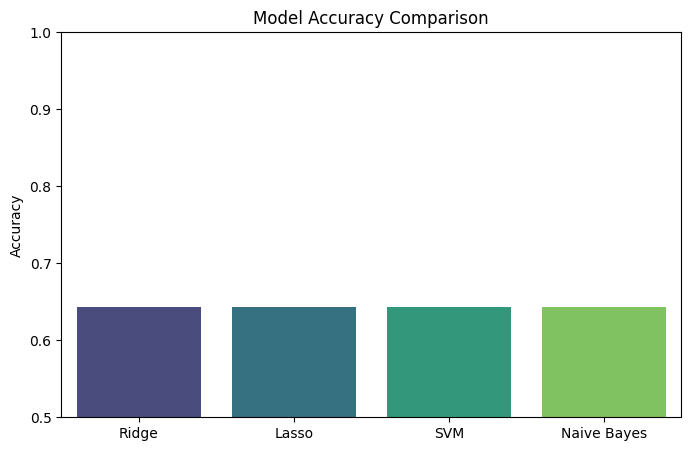

In [14]:
models = ['Ridge', 'Lasso', 'SVM', 'Naive Bayes']
accuracies = [ridge_acc, lasso_acc, svm_acc, nb_acc]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.show()